# Telecom Churn Case Study

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1. Data Reading and Understanding

In [2]:
# show max rows and columns
pd.set_option("display.max_columns",1000)
pd.set_option("display.max_rows",None)

In [3]:
# Reading csv file
data = pd.read_csv("telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# shape of data
data.shape

(99999, 226)

In [5]:
# dtype of features
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
# Missing value percentage
100 * data.isnull().sum()/data.shape[0] 

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [7]:
# Statistical Information of Continuous Columns

data.describe(percentiles=[0.30,0.60,0.85,0.95,0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
# Dropping Columns which are not use for our modelling

data.drop(["mobile_number","circle_id","last_date_of_month_6",'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9','date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9','fb_user_6',
       'fb_user_7', 'fb_user_8', 'fb_user_9','date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],axis=1,inplace=True)

In [9]:
data.shape

(99999, 208)

## 2. Data Cleaning and Preparation

### Imputing Missing Values

In [10]:
# Imputing missing with zero

data[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9']] = data[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9']].apply(lambda x: x.fillna(0))

In [11]:
# Imputing missing with zero
data[['arpu_3g_6','arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9']] = data[['arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9']].apply(lambda x: x.fillna(0))

In [12]:
# Missing value percentage
100 * data.isnull().sum()/data.shape[0] 

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

In [13]:
# Imputing Missing Value with Median

data[["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou",'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'spl_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8',
       'og_others_9', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_og_mou_9', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'isd_ic_mou_9', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'ic_others_9']]=data[["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou",'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'spl_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8',
       'og_others_9', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_og_mou_9', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'isd_ic_mou_9', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'ic_others_9']].apply(lambda x:x.fillna(x.median()))

In [14]:
data.columns.values

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9

In [15]:
# Missing value percentage
100 * data.isnull().sum()/data.shape[0] 

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

### Filtering High Value Customers

In [16]:
# Taking average of Total rechareges amount of month June and July

data["avg_rech_amt_6_7"] = (data["total_rech_amt_6"] + data["total_rech_amt_7"])/2

In [17]:
data.drop(["total_rech_amt_6","total_rech_amt_7"],axis=1,inplace=True)

In [18]:
# Finding 70th Percentile Value
avg_rech_amt_6_7_70percentile = np.percentile(data["avg_rech_amt_6_7"],70)
avg_rech_amt_6_7_70percentile

368.5

In [19]:
data["avg_rech_amt_6_7"].describe()

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.500000
Name: avg_rech_amt_6_7, dtype: float64

In [20]:
# Filtering High Value Customers

data = data[data["avg_rech_amt_6_7"]>=avg_rech_amt_6_7_70percentile]
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0

In [21]:
# Shape of high_value_customers
data.shape

(30011, 207)

#### There are 30011 premium customers that should not be loose. So for staying these customers in same operator ,telecom industry need to give them offers or discounts.

### Deriving Churn

In [22]:
# Deriving usage based churn where the customers did not use Incoming , Outgoing and Data services in September

data['Churn'] = np.where(data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)==0, 1,0)

In [23]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,Churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0

In [24]:
# Dropping Columns Having suffix ending with 9

data.drop(data.filter(regex="9$",axis=1).columns.values,axis=1,inplace=True)

In [25]:
data.shape

(30011, 158)

### Deriving Features

In [26]:
# we see that there is no total recharge amount for data, hence we have to derive this feature using average recharge and no. of recharge made in respective months
data['total_rech_amt_data_6']= data['av_rech_amt_data_6']*data['total_rech_data_6']
data['total_rech_amt_data_7']= data['av_rech_amt_data_7']*data['total_rech_data_7']
data['total_rech_amt_data_8']= data['av_rech_amt_data_8']*data['total_rech_data_8']

In [27]:
# Dropping features
data.drop(["av_rech_amt_data_6","total_rech_data_6","av_rech_amt_data_7","total_rech_data_7","av_rech_amt_data_8","total_rech_data_8"],axis=1,inplace=True)

In [28]:
data.shape

(30011, 155)

## 3. Exploratory Data Analysis

In [29]:
 data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,Churn,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,0.0,0.0,0.0
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,0.0,354.0,207.0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,

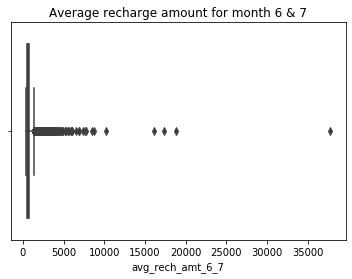

In [30]:
# Boxplot of avg_rech_amt_6_7
sns.boxplot(data.avg_rech_amt_6_7)
plt.title('Average recharge amount for month 6 & 7')
plt.show()

- Inference:
    - The Median for average recharge amount for month 6 and 7 is around 560.
    - The max avg amount spent on recharge in month 6 and 7 is around 40000.
    - Max of the customers spendings on recharge for month 6 and 7 is ranging from 0 to 1000.
    

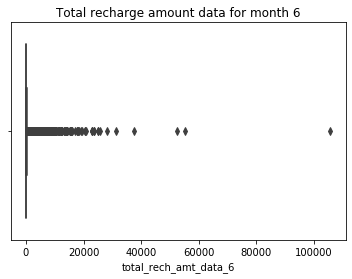

In [31]:
# Boxplot of total_rech_amt_data_6

sns.boxplot(data.total_rech_amt_data_6)
plt.title('Total recharge amount data for month 6')
plt.show()

- Inference:
    - The Median for Total recharge amount data for month 6 is 0.
    - The max Total amount spent on data recharge in month 6 is above 1000000.
    - The High value customers(Outliers) ranging form 10000 to1000000.
    

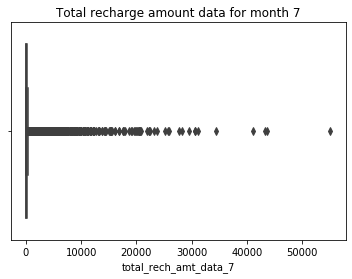

In [32]:
# Boxplot of total_rech_amt_data_7

sns.boxplot(data.total_rech_amt_data_7)
plt.title('Total recharge amount data for month 7')
plt.show()

- Inference:
    - The Median for Total recharge amount data for month 7 is 0.
    - The max Total amount spent on data recharge in month 7 is above 50000.
    - The High value customers(Outliers) ranging form 10000 to 600000.


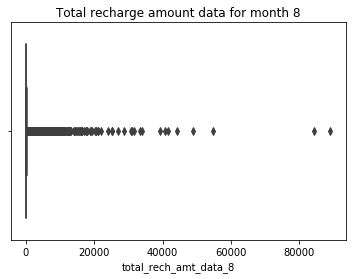

In [33]:
# Boxplot of total_rech_amt_data_8

sns.boxplot(data.total_rech_amt_data_8)
plt.title('Total recharge amount data for month 8')
plt.show()

- Inference:
    - The Median for Total recharge amount data for month 8 is 0.
    - The max Total amount spent on data recharge in month 8 is above 80000.
    - The High value customers(Outliers) ranging form 10000 to 900000.


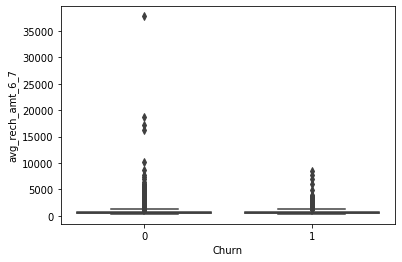

In [34]:
# Boxplot of avg_rech_amt_6_7 and Churn
sns.boxplot(data.Churn,data.avg_rech_amt_6_7)
plt.show()

- Inference:
    - The Median for both Churn and non-Churn is almost equaal to Zero for average recharge amount month 6 and 7.
    - The outlier for churn ranges from 2000 to 10000, whereas for non-churn it ranges from 2000 to 400000.
    - There are more outliers for Non-churn than in Churn.

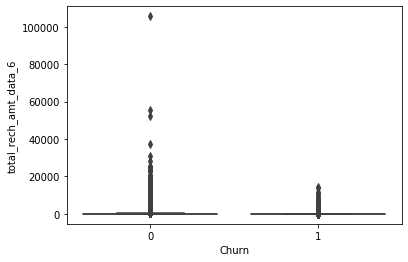

In [35]:
# Boxplot of total_rech_amt_data_6 & Churn

sns.boxplot(data.Churn,data.total_rech_amt_data_6)
plt.show()

- Inference:
    - The Median for both Churn and non-Churn is almost equaal to Zero for Total recharge amount data month 6.
    - There are more outliers for Non-churn than in Churn.

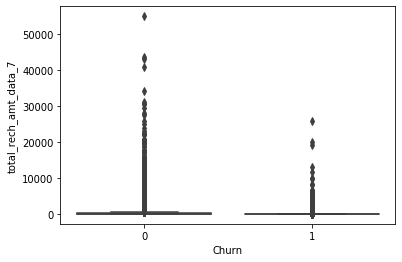

In [36]:
# Boxplot of total_rech_amt_data_7

sns.boxplot(data.Churn,data.total_rech_amt_data_7)
plt.show()

- Inference:
    - The Median for both Churn and non-Churn is almost equaal to Zero for Total recharge amount data month 7.
    - There are more outliers for Non-churn than in Churn.

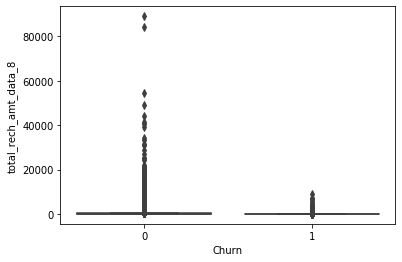

In [37]:
# Boxplot of total_rech_amt_data_8 & Churn

sns.boxplot(data.Churn,data.total_rech_amt_data_8)
plt.show()

- Inference:
    - The Median for both Churn and non-Churn is almost equaal to Zero for Total recharge amount data month 8.
    - There are more outliers for Non-churn than in Churn.

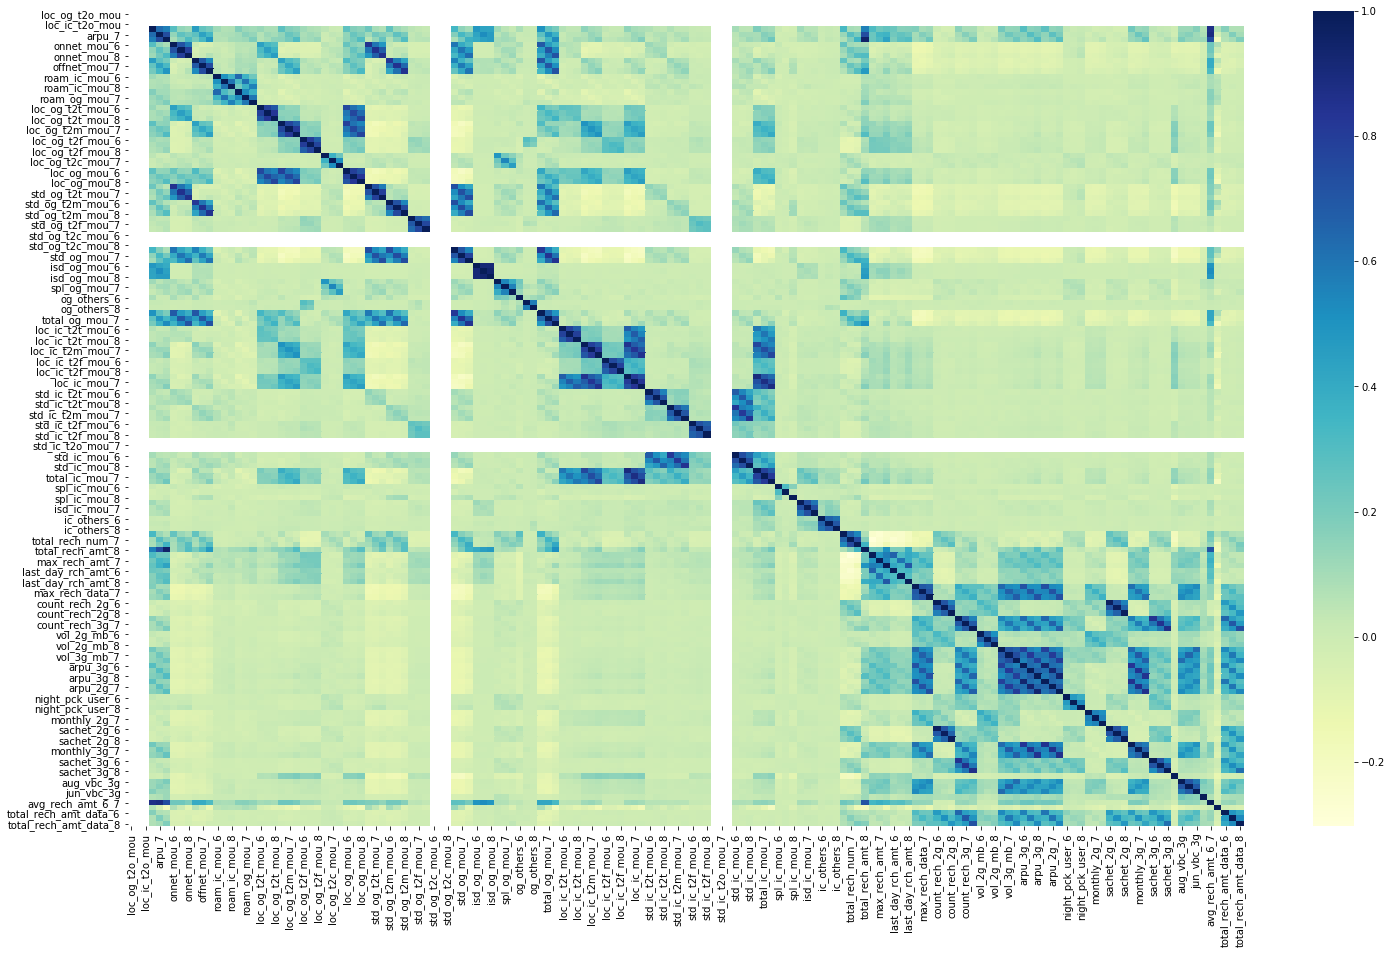

In [38]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot=False,cmap="YlGnBu")
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Putting feature variable to X
X = data.drop('Churn', axis=1)

X.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,0.0,0.0,0.0
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0.0,354.0,207.0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446

In [41]:
# Putting response variable to y
y = data['Churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: Churn, dtype: int32

In [42]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [43]:
print("X_train Shape :",X_train.shape)
print("y_train Shape :",y_train.shape)
print("X_test Shape :",X_test.shape)
print("y_test Shape :",y_test.shape)

X_train Shape : (21007, 154)
y_train Shape : (21007,)
X_test Shape : (9004, 154)
y_test Shape : (9004,)


In [44]:
# Scaling X_train and X_test
scaler = StandardScaler()

X_train = pd.DataFrame(columns = X_train.columns,data = scaler.fit_transform(X_train))
X_test = pd.DataFrame(columns = X_test.columns,data = scaler.transform(X_test))

In [45]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
0,0.0,0.0,0.0,-0.618756,-0.252174,-0.318969,0.085352,0.528093,0.318327,-0.559194,-0.720359,-0.603014,-0.219715,-0.170559,-0.173141,-0.254904,-0.225905,-0.209478,-0.395488,-0.365319,-0.325709,-0.714679,-0.742577,-0.710105,-0.299408,-0.301536,-0.317205,1.151081,-0.212776,-0.250817,-0.734936,-0.733830,-0.679911,0.354743,0.832486,0.573021,-0.187776,-0.343781,-0.219475,-0.165637,-0.152594,-0.152592,0.0,0.0,0.0,0.109161,0.319397,0.234391,-0.047862,-0.048191,-0.045443,1.399850,-0.008382,-0.170889,-0.302525,-0.017153,-0.019525,-0.289160,-0.108047,-0.158790,-0.419876,-0.373529,-0.409171,-0.674134,-0.629575,-0.696065,-0.340282,-0.322373,-0.327124,-0.743335,-0.689856,-0.749397,0.678494,0.571342,0.626536,0.097901,0.255150,0.706057,-0.14269,-0.142729,-0.127334,0.0,0.0,0.0,0.439447,0.484021,0.835582,-0.503954,-0.430609,-0.329312,0.396055,-0.09183,-0.249042,-0.163302,-0.155238,-0.152432,-0.079485,-0.089744,-0.095158,0.715529,1.258757,1.539738,-0.293746,-0.797034,-0.575193,-0.648201,-0.719321,-0.603403,-0.580228,-0.537156,-0.383761,-0.529666,-0.360903,0.149197,-0.381463,-0.286843,-0.283981,-0.261239,-0.290296,0.475634,-0.256739,-0.306738,-0.328333,-0.313554,-0.320867,-0.321241,-0.323095,-0.337581,-0.330357,-0.332171,-0.103583,-0.100969,-0.097794,-0.334248,-0.335335,-0.316581,-0.293621,0.220354,-0.326445,-0.302655,-0.301802,-0.301673,-0.153647,-0.151671,-0.136997,-0.938635,-0.329669,-0.330304,-0.310692,-0.132291,-0.520352,-0.234072,-0.242118,-0.203598
1,0.0,0.0,0.0,-0.646107,-0.187018,-0.120157,-0.405101,-0.571299,-0.292374,-0.419084,-0.625171,-0.435024,-0.219715,-0.170559,-0.173141,-0.254904,-0.225905,-0.209478,0.063773,-0.269947,0.175540,0.039303,-0.400047,-0.251651,0.667167,0.988774,2.358703,-0.232686,-0.212776,-0.250817,0.106036,-0.373066,0

In [46]:
# Checking the Churn Rate
churn = (sum(data['Churn'])/len(data['Churn'].index))*100
churn

8.64016527273333

## 4. Model Building

## Principal Components Analysis

In [47]:
pca = PCA(random_state = 42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
pca.components_

array([[-3.66336910e-19, -1.11022302e-16,  2.22044605e-16, ...,
         1.36041990e-01,  1.46875624e-01,  1.25642650e-01],
       [-3.47612309e-19,  1.66533454e-16,  0.00000000e+00, ...,
        -5.54543188e-02, -5.49422983e-02, -4.01014117e-02],
       [ 2.33642852e-19,  2.22044605e-16,  6.93889390e-17, ...,
         6.34782005e-02,  7.50876544e-02,  7.27140385e-02],
       ...,
       [-0.00000000e+00,  1.85462333e-01,  4.46946817e-01, ...,
        -4.85722573e-17,  9.71445147e-17,  4.85722573e-17],
       [ 9.99999818e-01, -4.19902618e-04,  1.68324768e-04, ...,
        -1.04354459e-18,  1.50433051e-18, -8.43644815e-19],
       [-0.00000000e+00,  4.19325610e-02,  6.18455897e-01, ...,
         6.93889390e-18,  1.17961196e-16, -8.32667268e-17]])

In [49]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu 

array([0.1030769 , 0.18435096, 0.25516976, 0.30309369, 0.34368168,
       0.37710682, 0.40613681, 0.43134695, 0.45570341, 0.47959114,
       0.50120049, 0.52134258, 0.54030594, 0.55890449, 0.57712628,
       0.59433247, 0.61094944, 0.62618238, 0.64064925, 0.6545104 ,
       0.6677077 , 0.68002467, 0.69159885, 0.70287724, 0.71382759,
       0.72434281, 0.73422435, 0.74372634, 0.75270223, 0.7608376 ,
       0.7687131 , 0.77642981, 0.78381554, 0.79082318, 0.79764576,
       0.80426072, 0.81077906, 0.81709204, 0.82337706, 0.82941012,
       0.83506146, 0.84067547, 0.84618729, 0.85159614, 0.85685017,
       0.86198327, 0.86694326, 0.87153368, 0.87597557, 0.88031646,
       0.8846195 , 0.88878304, 0.89276136, 0.89650686, 0.90016047,
       0.90376212, 0.90730311, 0.91073806, 0.9140571 , 0.91710947,
       0.92009377, 0.92303866, 0.9259663 , 0.92881976, 0.93158712,
       0.93429856, 0.93698348, 0.93955822, 0.94205712, 0.9443531 ,
       0.94658591, 0.94879096, 0.95094094, 0.95305756, 0.95513

In [50]:
# look at explainded variance of PCA components
print(pd.Series(np.round(var_cumu, 4)*100))

0       10.31
1       18.44
2       25.52
3       30.31
4       34.37
5       37.71
6       40.61
7       43.13
8       45.57
9       47.96
10      50.12
11      52.13
12      54.03
13      55.89
14      57.71
15      59.43
16      61.09
17      62.62
18      64.06
19      65.45
20      66.77
21      68.00
22      69.16
23      70.29
24      71.38
25      72.43
26      73.42
27      74.37
28      75.27
29      76.08
30      76.87
31      77.64
32      78.38
33      79.08
34      79.76
35      80.43
36      81.08
37      81.71
38      82.34
39      82.94
40      83.51
41      84.07
42      84.62
43      85.16
44      85.69
45      86.20
46      86.69
47      87.15
48      87.60
49      88.03
50      88.46
51      88.88
52      89.28
53      89.65
54      90.02
55      90.38
56      90.73
57      91.07
58      91.41
59      91.71
60      92.01
61      92.30
62      92.60
63      92.88
64      93.16
65      93.43
66      93.70
67      93.96
68      94.21
69      94.44
70      94.66
71    

In [51]:
pca.n_components_

154

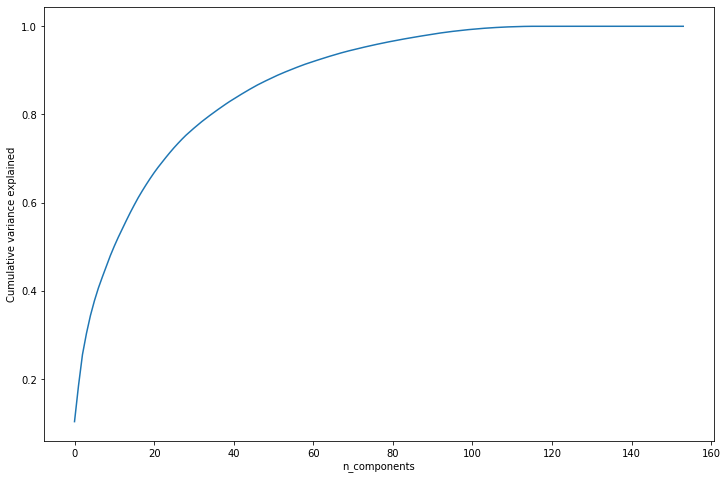

In [52]:
# Scree Plot

fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("n_components")
plt.show()

#### We see that 60 components explain 90% of the variance

## Model 1 : Logisitc Regression with PCA

In [53]:
# creating pipeline
PCA_VARS = 60
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [54]:
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8077307564145285

### Evaluation on test dataset

In [55]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6595 1639]
 [ 112  658]]
Sensitivity: 	0.85
Specificity: 	0.8
AUC:    	 0.9


In [56]:
y_train.value_counts()/y_train.shape[0]

0    0.913219
1    0.086781
Name: Churn, dtype: float64

In [57]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [ 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60,80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [58]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                   

In [59]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.193742,0.002679,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,1.382504,0.125792,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,1.225524,0.036527,0.025134,0.003752,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.873711,0.876709,0.881554,0.878296,0.892008,0.880456,0.006306,14
3,1.877251,0.138606,0.036271,0.007600,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.874686,0.876757,0.881815,0.877329,0.892029,0.880523,0.006205,11
4,1.451796,0.100696,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
5,1.744137,0.108835,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
6,1.638219,0.075851,0.035748,0.003042,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.874223,0.877385,0.882142,0.878534,0.893226,0.881102,0.006570,1
7,2.258560,0.228680,0.046477,0.010824,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.874425,0.876175,0.882220,0.877171,0.892323,0.880463,0.006472,13
8,1.407237,0.114500,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
9,1.620295,0.017334,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31


In [60]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8811021370032472
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [61]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6849 1385]
 [ 126  644]]
Sensitivity: 	0.84
Specificity: 	0.83
AUC:    	 0.9


## Model 2 : Decision Tree


In [62]:
dt = DecisionTreeClassifier(class_weight = {0:0.1, 1: 0.9},random_state=42)
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [63]:
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [64]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=folds,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [65]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.7min finished


Wall time: 1min 43s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best

In [66]:
# cross validation results
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.029701,0.056092,0.021485,0.008582,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.829986,0.832048,0.847385,0.861985,0.863302,0.846941,0.014167,19
1,0.925131,0.010342,0.015170,0.000981,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.829986,0.832048,0.847385,0.861985,0.863302,0.846941,0.014167,19
2,0.917642,0.018759,0.014281,0.000389,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.829986,0.832048,0.847385,0.861985,0.863302,0.846941,0.014167,19
3,0.908144,0.008835,0.014732,0.000741,2,50,"{'max_depth': 2, 'min_samples_leaf': 50}",0.829986,0.832048,0.847385,0.861985,0.863302,0.846941,0.014167,19
4,1.011774,0.046382,0.014782,0.001183,2,100,"{'max_depth': 2, 'min_samples_leaf': 100}",0.829986,0.832048,0.847385,0.861985,0.863302,0.846941,0.014167,19
5,1.115416,0.026833,0.016955,0.004762,2,500,"{'max_depth': 2, 'min_samples_leaf': 500}",0.829986,0.832048,0.847385,0.861985,0.863302,0.846941,0.014167,19
6,1.400853,0.094486,0.015359,0.002326,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.866724,0.859844,0.873976,0.878458,0.892974,0.874395,0.011247,13
7,1.302357,0.020934,0.012904,0.000967,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.866724,0.859844,0.873976,0.878458,0.892974,0.874395,0.011247,13
8,1.335028,0.040317,0.015592,0.002217,3,20,"{'max_depth': 3, 'min_samples_leaf': 20}",0.866724,0.859844,0.873976,0.878458,0.892974,0.874395,0.011247,13
9,1.564181,0.047713,0.015559,0.001017,3,50,"{'max_depth': 3, 'min_samples_leaf': 50}",0.866724,0.859844,0.873976,0.878458,0.892974,0.874395,0.011247,13


In [67]:
# print best hyperparameters
print("Best AUC: ", grid_search.best_score_)
print("Best hyperparameters: ", grid_search.best_params_)

Best AUC:  0.9017307334785313
Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 100}


In [68]:
# predict churn on test data
y_pred = grid_search.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7224 1010]
 [ 130  640]]
Sensitivity: 	0.83
Specificity: 	0.88
AUC:    	 0.92


## Model 3 : Random Forest 

In [69]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight={0:0.1,1:0.9})
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = folds,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [70]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 15.2min finished


Wall time: 15min 18s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                  

In [71]:
# cross validation results
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.633230,0.087955,0.261215,0.198461,2,5,10,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.857556,0.858566,0.866227,0.870219,0.893506,0.869215,0.013033,115
1,1.135387,0.225406,0.562273,0.369110,2,5,25,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.858468,0.859681,0.870902,0.872828,0.897348,0.871846,0.013994,110
2,2.301650,0.409860,0.717277,0.328284,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.866334,0.864753,0.875758,0.880327,0.902634,0.877961,0.013630,106
3,4.363770,0.227258,0.810866,0.294582,2,5,100,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.872376,0.869749,0.878127,0.886235,0.904555,0.882208,0.012523,96
4,0.901541,0.260850,0.394588,0.166393,2,10,10,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.857556,0.858566,0.866227,0.870219,0.893506,0.869215,0.013033,115
5,1.291886,0.171265,0.409414,0.250474,2,10,25,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.858468,0.859681,0.870902,0.872828,0.897348,0.871846,0.013994,110
6,2.126369,0.353874,0.614812,0.342434,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.866334,0.864753,0.875758,0.880327,0.902634,0.877961,0.013630,106
7,4.624037,0.682102,0.571917,0.428524,2,10,100,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.872376,0.869749,0.878127,0.886235,0.904562,0.882210,0.012526,95
8,1.081510,0.137600,0.281444,0.068833,2,20,10,"{'max_depth': 2, 'min_samples_leaf': 20, 'n_es...",0.857556,0.858566,0.866227,0.870219,0.893506,0.869215,0.013033,115
9,1.227735,0.159073,0.432424,0.264230,2,20,25,"{'max_depth': 2, 'min_samples_leaf': 20, 'n_es...",0.858468,0.859681,0.870902,0.872828,0.897348,0.871846,0.013994,110


In [72]:
# print best hyperparameters
print("Best AUC: ", grid_search.best_score_)
print("Best hyperparameters: ", grid_search.best_params_)

Best AUC:  0.9234731120134198
Best hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 100}


In [73]:
# predict churn on test data
y_pred = grid_search.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8032  202]
 [ 290  480]]
Sensitivity: 	0.62
Specificity: 	0.98
AUC:    	 0.94


In [74]:
rf_model_gridsearch = grid_search.best_estimator_
rf_model_gridsearch

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [75]:
rf_model_gridsearch.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.43183056e-03,
       9.75808344e-03, 4.19498705e-02, 5.10417080e-03, 5.70583962e-03,
       1.06326920e-02, 5.36087623e-03, 5.65942658e-03, 2.10825512e-02,
       2.23370068e-03, 3.48080910e-03, 3.24009082e-02, 2.20755756e-03,
       4.12354493e-03, 2.74777794e-02, 4.88048022e-03, 6.74263142e-03,
       1.61657461e-02, 5.34625525e-03, 7.17105029e-03, 3.54842897e-02,
       2.91898050e-03, 2.52207787e-03, 6.50378080e-03, 1.40559381e-03,
       1.46204055e-03, 1.85905261e-03, 4.93590185e-03, 9.87422668e-03,
       4.20641935e-02, 3.91111187e-03, 4.98502358e-03, 8.80837564e-03,
       3.90865933e-03, 5.24273448e-03, 9.89564234e-03, 5.70754040e-04,
       8.52801613e-04, 6.85952309e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.90372984e-03, 6.78356280e-03, 7.37078639e-03,
       9.82060466e-04, 1.34579166e-03, 1.24105726e-03, 2.69567392e-03,
       4.91891368e-03, 6.60321612e-03, 1.39442397e-03, 7.49495308e-05,
      

In [76]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_model_gridsearch.feature_importances_*100
})

## Top 30 Features 

In [89]:
imp_features = imp_df.sort_values(by="Imp",ascending=False).head(30)
imp_features

,Varname,Imp
89,total_ic_mou_8,6.452186
59,total_og_mou_8,6.295211
108,last_day_rch_amt_8,4.953120
32,loc_og_mou_8,4.206419
5,arpu_8,4.194987
102,total_rech_amt_8,3.871161
23,loc_og_t2m_mou_8,3.548429
14,roam_ic_mou_8,3.240091
71,loc_ic_mou_8,3.162883
17,roam_og_mou_8,2.747778


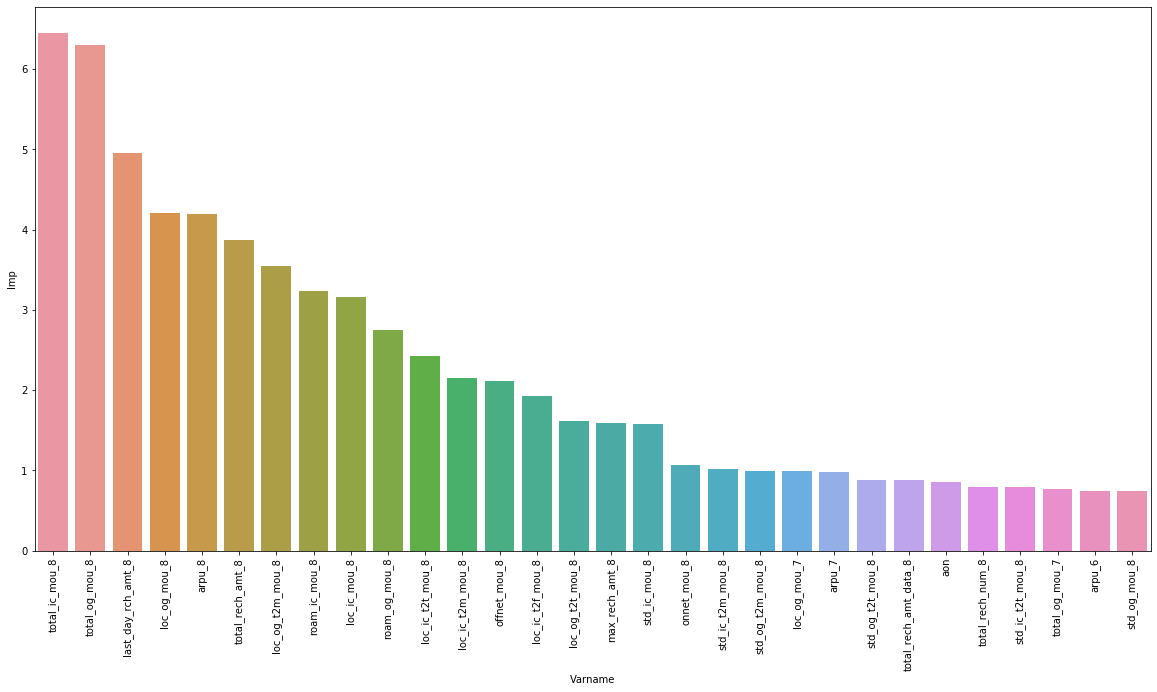

In [90]:
# Plotting Feature Importance

plt.figure(figsize=(20, 10))
sns.barplot(x='Varname', y= 'Imp', data=imp_features)
plt.xticks(rotation="vertical")
plt.show()

In [78]:
top_30 =list(imp_df.sort_values(by="Imp",ascending=False).head(30).Varname)
top_30

['total_ic_mou_8',
 'total_og_mou_8',
 'last_day_rch_amt_8',
 'loc_og_mou_8',
 'arpu_8',
 'total_rech_amt_8',
 'loc_og_t2m_mou_8',
 'roam_ic_mou_8',
 'loc_ic_mou_8',
 'roam_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'offnet_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_og_t2t_mou_8',
 'max_rech_amt_8',
 'std_ic_mou_8',
 'onnet_mou_8',
 'std_ic_t2m_mou_8',
 'std_og_t2m_mou_8',
 'loc_og_mou_7',
 'arpu_7',
 'std_og_t2t_mou_8',
 'total_rech_amt_data_8',
 'aon',
 'total_rech_num_8',
 'std_ic_t2t_mou_8',
 'total_og_mou_7',
 'arpu_6',
 'std_og_mou_8']

## Model 4 : Logistic Regression

In [79]:
X_train = X_train[top_30]
X_test = X_test[top_30]

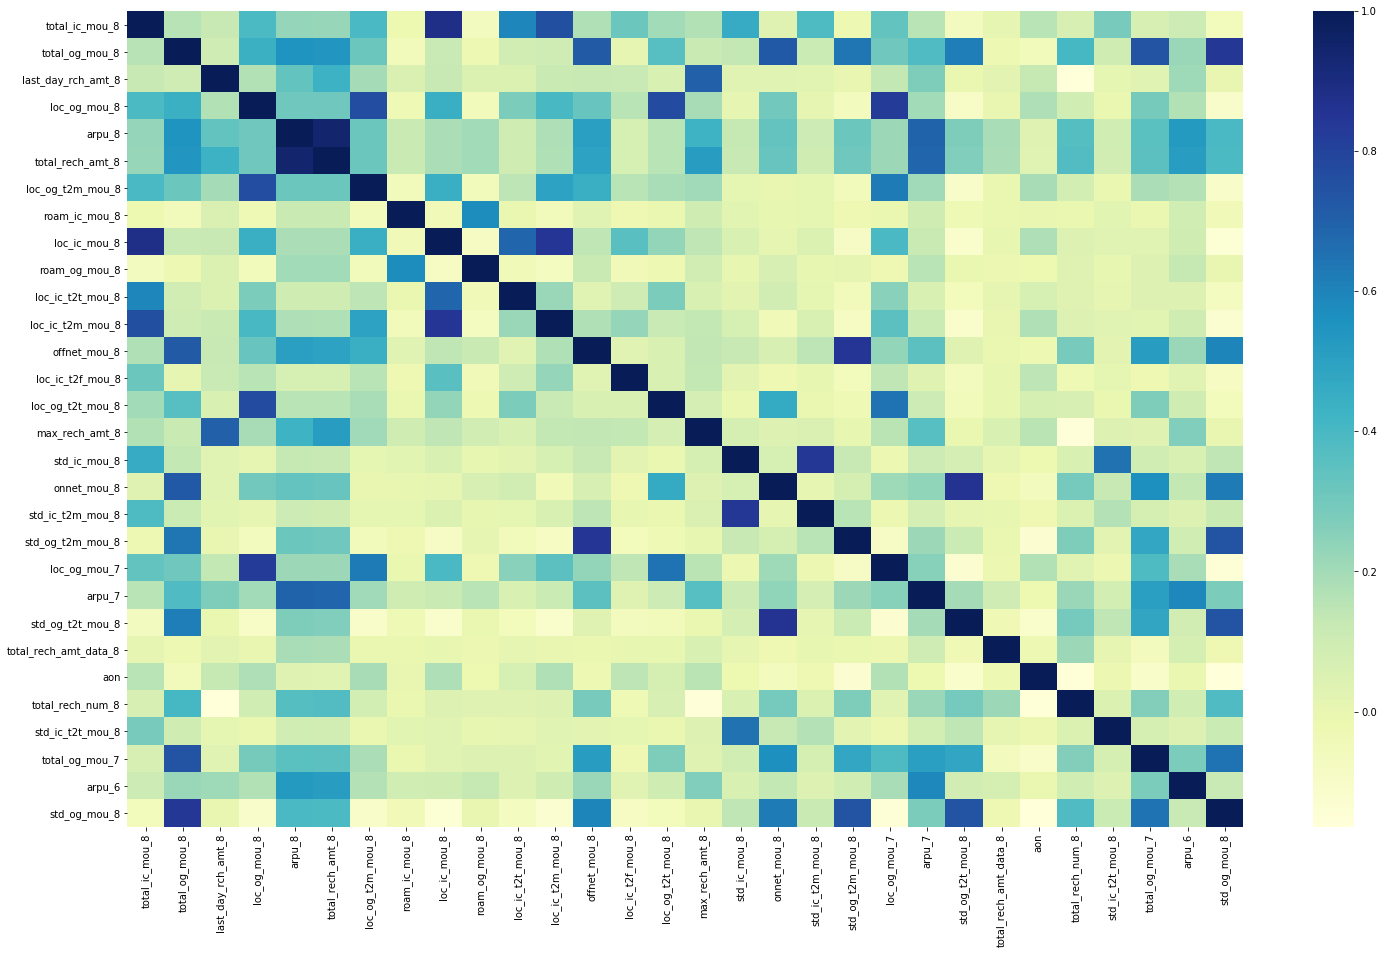

In [80]:
plt.figure(figsize=(25,15))
sns.heatmap(X_train.corr(),cmap="YlGnBu")
plt.show()

In [81]:
steps = [ 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [82]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                         

In [83]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8859886161787497
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [84]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7029 1205]
 [ 140  630]]
Sensitivity: 	0.82
Specificity: 	0.85
ROC:    	 0.9


### Extract the intercept and the coefficients from the logistic model

In [85]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [86]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [87]:
# coefficients
coefficients = logistic_model.coef_.reshape((30, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [88]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_og_mou_8,last_day_rch_amt_8,loc_og_mou_8,arpu_8,total_rech_amt_8,loc_og_t2m_mou_8,roam_ic_mou_8,loc_ic_mou_8,roam_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,offnet_mou_8,loc_ic_t2f_mou_8,loc_og_t2t_mou_8,max_rech_amt_8,std_ic_mou_8,onnet_mou_8,std_ic_t2m_mou_8,std_og_t2m_mou_8,loc_og_mou_7,arpu_7,std_og_t2t_mou_8,total_rech_amt_data_8,aon,total_rech_num_8,std_ic_t2t_mou_8,total_og_mou_7,arpu_6,std_og_mou_8
0,-1.476258,-0.505868,-10.352029,-0.50596,0.568967,0.172257,-0.561258,-0.854726,0.110317,4.260688,-1.344497,-2.410779,-3.276926,6.656516,-1.007069,-1.422289,0.185788,-0.180801,7.420666,0.212098,0.114344,0.186358,0.326623,-0.412389,-0.832907,-0.310237,-0.167324,-0.059511,0.419315,0.232819,-0.327485



### According to the model following variables will contribute the most towards the probability of getting a customer Churn. As they have high coefficients.
- total_og_mou_8
- onnet_mou_8
- offnet_mou_8
- loc_ic_mou_8
- loc_ic_t2m_mou_8

# Conclusion

This Case study helps Telecom industries to identify whether the Customers will churn or not. In our Modeling process we performed modeling using various algorithums like Logistic regression with PCA(Model 1), Decision Tree(Model 2),Random Forest(Model 3) and Logistic Regression(Model 4).we found out the Logistic regression with PCA(model 1) is the best model.As we  evaluated on the basis of accuracy and  sensitivity on both training and test data and we obtained the following results:
          		
- Test Data: Accuracy 90% and Sensitivity 85%
- Training Data: Accuracy 88% and Sensitivity 84% 

So we can conclude that our model has a high accuracy and high Sensitivity which will help the Telecom industry to predict churning of the customers from the collected data.


